# KNN 

### K-Nearest Neighbors

- Klasifikasi suatu titik data, berdasarkan bagaimana titik-titik data di sekitarnya diklasifikasikan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
df = pd.DataFrame(
    iris['data'], columns = ['SL', 'SW', 'PL', 'PW']
)
df['target'] = iris['target']
df.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


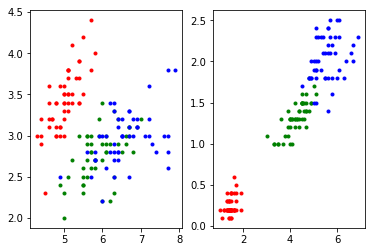

In [9]:
plt.subplot(121)
plt.plot(df['SL'][df['target']==0], df['SW'][df['target']==0], 'r.')
plt.plot(df['SL'][df['target']==1], df['SW'][df['target']==1], 'g.')
plt.plot(df['SL'][df['target']==2], df['SW'][df['target']==2], 'b.')
plt.subplot(122)
plt.plot(df['PL'][df['target']==0], df['PW'][df['target']==0], 'r.')
plt.plot(df['PL'][df['target']==1], df['PW'][df['target']==1], 'g.')
plt.plot(df['PL'][df['target']==2], df['PW'][df['target']==2], 'b.')

In [10]:
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(
    df[['SL', 'SW', 'PL', 'PW']], df['target'], test_size = .2
)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr, ytr)
# euclidean

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [12]:
model.predict(xts)

array([2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1,
       1, 0, 1, 0, 0, 0, 1, 2])

In [15]:
np.array(yts.tolist())

array([2, 0, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2,
       1, 0, 1, 0, 0, 0, 1, 2])

In [19]:
# np.array(model.predict_proba(xts).tolist())
xts.iloc[0]

SL    5.8
SW    2.8
PL    5.1
PW    2.4
Name: 114, dtype: float64

### Nearest Neighbors

In [29]:
# 1 data point terdekat dengan si xts.iloc[0] = 5.8 2.8 5.1 2.4
from sklearn.neighbors import NearestNeighbors
x = NearestNeighbors(n_neighbors = 1)
x.fit(xtr)
x.kneighbors([xts.iloc[0]])

(array([[0.50990195]]), array([[43]], dtype=int64))

In [30]:
#  5.8 2.8 5.1 2.4
xtr.iloc[43]

SL    5.8
SW    2.7
PL    5.1
PW    1.9
Name: 142, dtype: float64

### K value

1. sqrt(n) : akar pangkat 2 dari total data training
2. pilih nilai yang ganjil

In [31]:
len(xtr)

120

In [35]:
k = round(len(xtr) ** .5)
k

11

In [37]:
model2 = KNeighborsClassifier(n_neighbors = k)
model2.fit(xtr, ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [39]:
print(model.score(xts, yts))
print(model2.score(xts, yts))

0.9666666666666667
0.9666666666666667


In [40]:
print(model.predict([[5.8, 2.8, 5.1, 2.4]]))
print(model2.predict([[5.8, 2.8, 5.1, 2.4]]))

[2]
[2]


In [50]:
print(yts.loc[xts.iloc[0].name])
xts.iloc[0]

2


SL    5.8
SW    2.8
PL    5.1
PW    2.4
Name: 114, dtype: float64

In [57]:
from sklearn.metrics import classification_report
print(classification_report(yts, model.predict(xts)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.92      0.96        12
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [53]:
from sklearn.metrics import classification_report
print(classification_report(
    df['target'], 
    model.predict(df[['SL','SW','PL','PW']]))
)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

